In [1]:
from google.colab import drive #Dataset mounted from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/Emotion_final.csv"

In [3]:
import numpy as np
import pandas as pd # Used pandas for data manipulation, analysis and cleaning
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import re
import bs4
import requests
import spacy
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
from spacy.matcher import Matcher
from spacy.tokens import Span 
import networkx as nx
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
datasentiment = pd.read_csv(path)

In [6]:
datasentiment 

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the governing parties pummelled by a dismayed electora,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed coup,fear


In [7]:
datasentiment.info() # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [8]:
datasentiment.head()  #observing top 5 rows of the dataset

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [9]:
datasentiment.tail() #observing bottom 5 rows of the dataset


,Text,Emotion
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the governing parties pummelled by a dismayed electora,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed coup,fear
21458,"I am dismayed , but not surpris",fear


In [10]:
datasentiment.shape 

(21459, 2)

In [11]:
def remove_punctuation(text): #function for removing punctuation
    import string 
    translator = str.maketrans('', '', string.punctuation) #replace the punctuations with no space
    return text.translate(translator)

In [12]:
datasentiment['Text'] = datasentiment['Text'].apply(remove_punctuation)
datasentiment.head(10) #observing first 10 rows to confirm punctuation removal

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasnt sure why that was,sadness
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise
7,i feel as confused about life as a teenager or as jaded as a year old man,fear
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,happy
9,i feel romantic too,love


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# extracting the stopwords from nltk library
sw = stopwords.words('english') 
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [15]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw] # removing the stop words and lowercasing the selected words
    return " ".join(text) 

In [17]:
datasentiment['Text'] = datasentiment['Text'].apply(stopwords)
datasentiment.head(10) #observing first 10 rows to confirm stopwords are removed


,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger
5,ive feeling little burdened lately wasnt sure,sadness
6,ive taking milligrams times recommended amount ive fallen asleep lot faster also feel like funny,surprise
7,feel confused life teenager jaded year old man,fear
8,petronas years feel petronas performed well made huge profit,happy
9,feel romantic,love


In [18]:
# Specifying special characters to be removed
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","â€“","ï¿½","$"]

In [26]:
for char in spec_chars:
    datasentiment['Text'] = datasentiment['Text'].str.replace(char, ' ') #removing special character and replacing it with space

In [29]:
datasentiment.head() #observing first 5 rows to confirm special characters are removed

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


In [30]:
# function to remove numbers
def number_removal(text):
    if type(text) == int:
        return text
    else:
        text = ''.join([i for i in text if not i.isdigit()])
        return text

In [31]:
datasentiment['Text'] = datasentiment['Text'].apply(number_removal)
datasentiment.head() #observing first 5 rows to confirm numbers are removed

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


In [32]:
ADDITIONAL_STOPWORDS = ['dont','cant','im', 'ive', 'int64','dtype','href'] #added stop words after visualizing wordcloud

In [35]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer() #All the words that are not designated as a stop word is then lemmatized after encoding 
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
words = basic_clean(''.join(str(datasentiment['Text'].tolist())))

In [38]:
words[:30]

['didnt',
 'feel',
 'humiliated',
 'go',
 'feeling',
 'hopeless',
 'damned',
 'hopeful',
 'around',
 'someone',
 'care',
 'awake',
 'grabbing',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'ever',
 'feeling',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feeling',
 'grouchy',
 'feeling',
 'little',
 'burdened']

In [39]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(feel, like)         2267
(make, feel)          375
(feeling, little)     271
(still, feel)         231
(feel, little)        228
(feeling, like)       207
(feeling, bit)        200
(feel, really)        189
(feeling, pretty)     183
(feel, bit)           164
(made, feel)          159
(time, feel)          156
(know, feel)          145
(always, feel)        138
(didnt, feel)         136
(help, feel)          135
(still, feeling)      131
(would, feel)         131
(day, feel)           129
(want, feel)          127
(feel, pretty)        127
(really, feel)        125
(feeling, really)     124
(left, feeling)       119
(could, feel)         112
(also, feel)          111
(even, though)        109
(life, feel)          107
(feel, need)          104
(feeling, quite)       98
dtype: int64

In [40]:
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

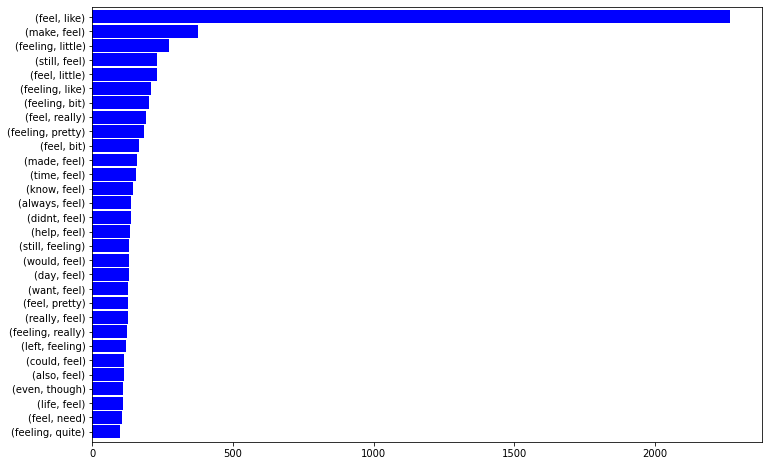

In [41]:
bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [42]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(datasentiment['Text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

Output hidden; open in https://colab.research.google.com to view.

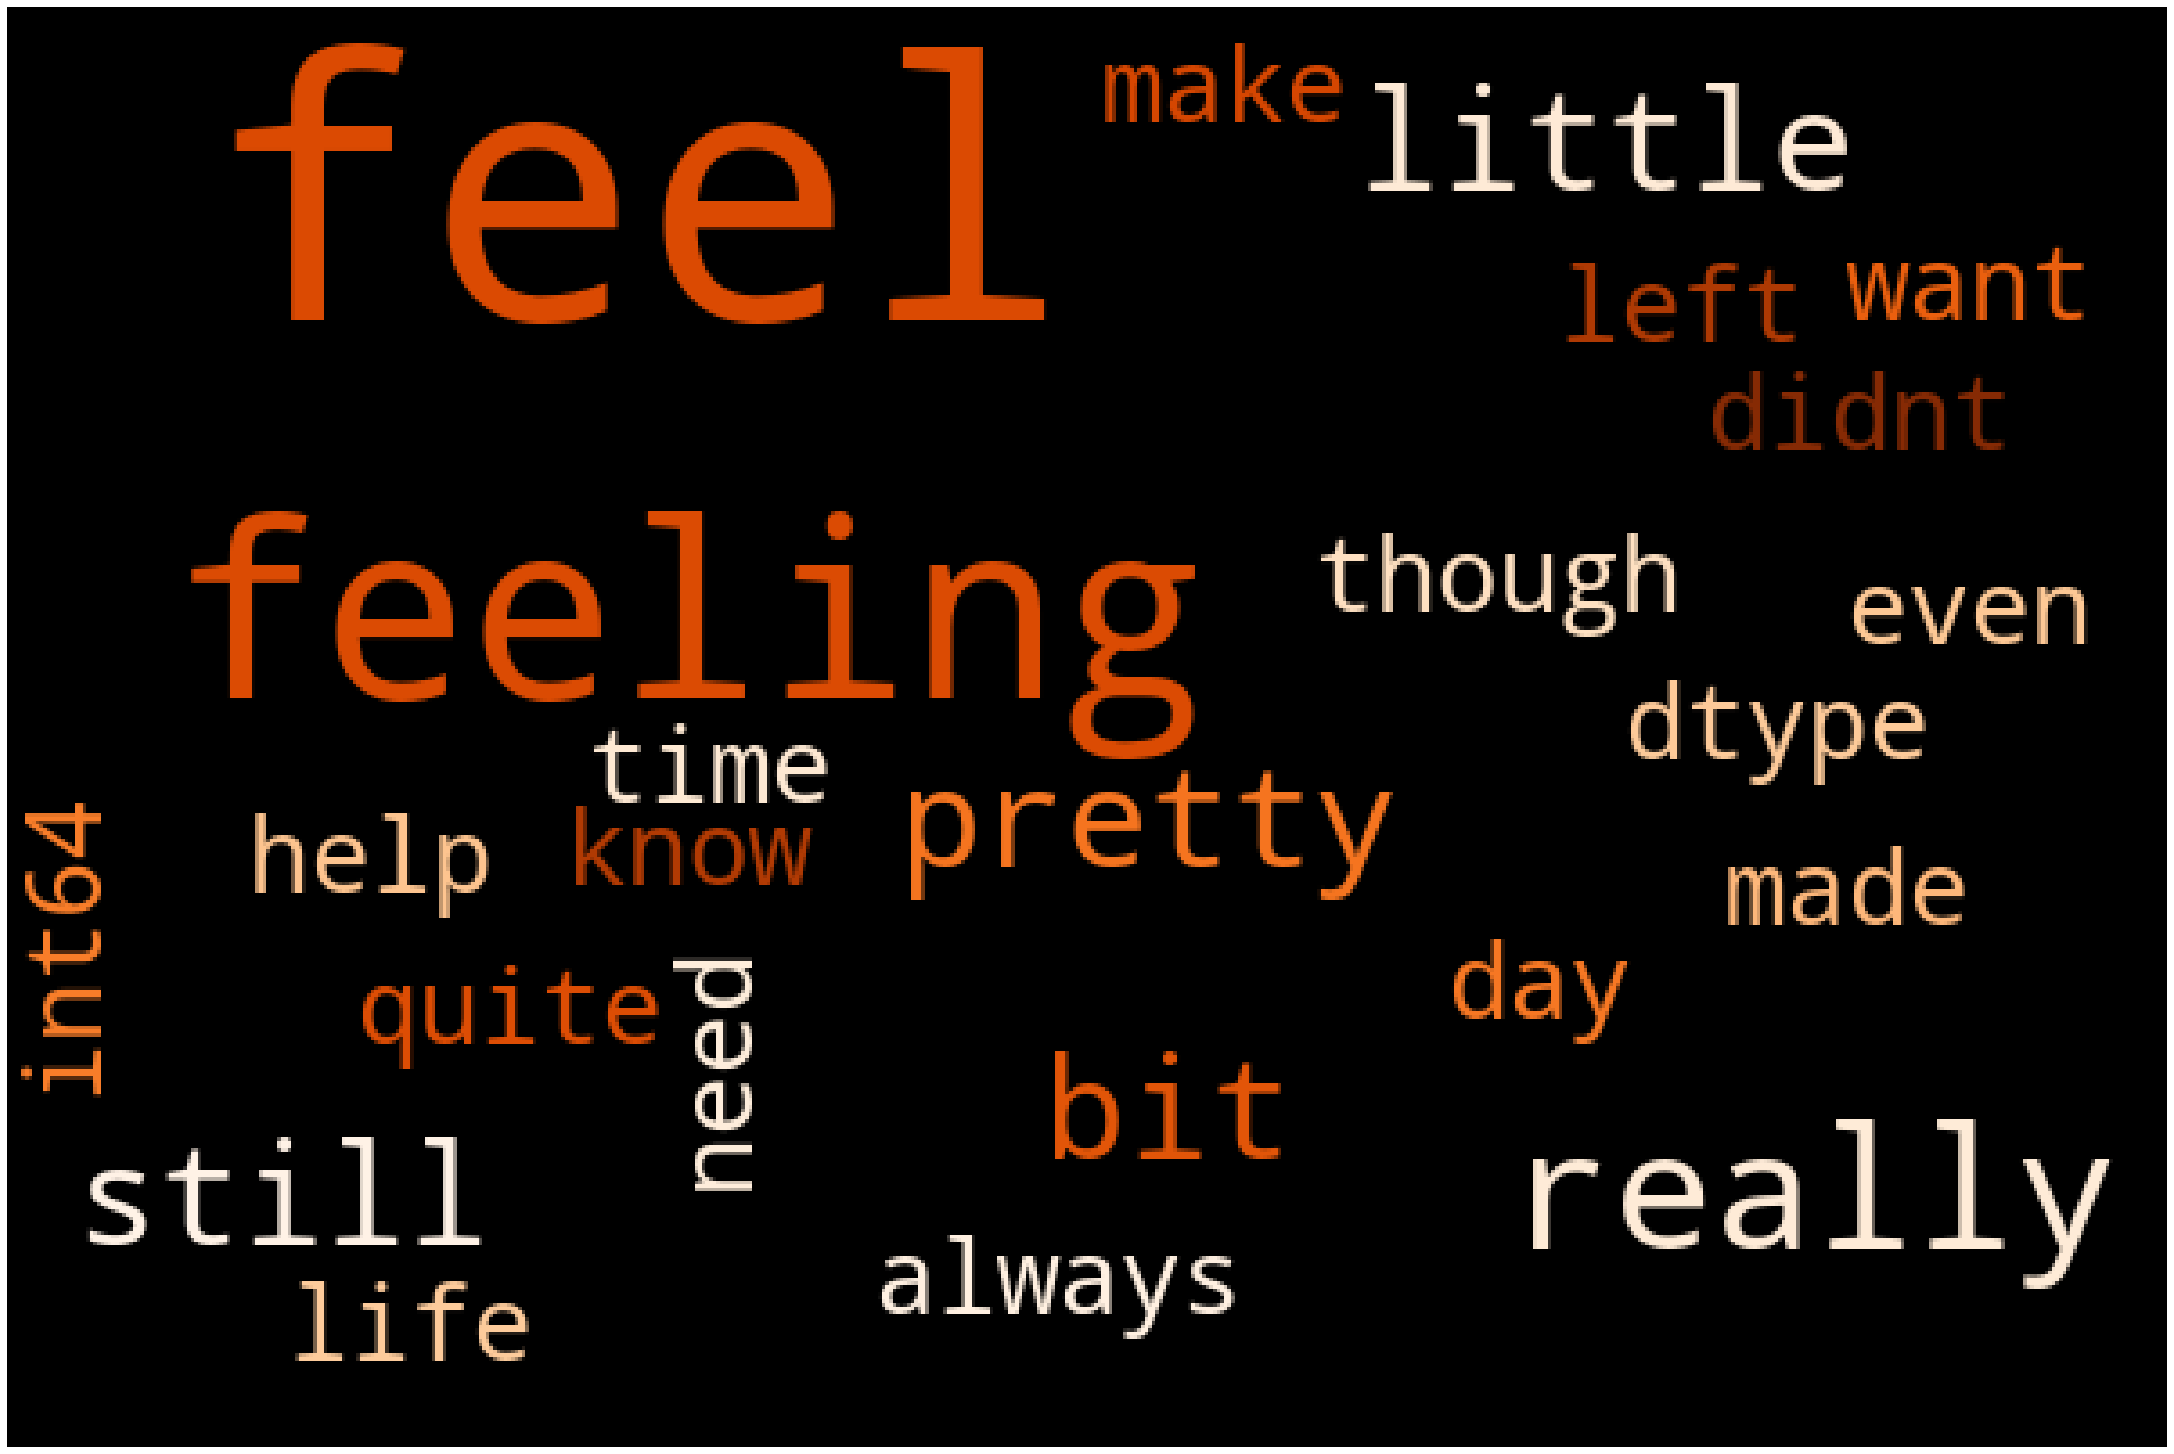

In [43]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(bigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [44]:
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]

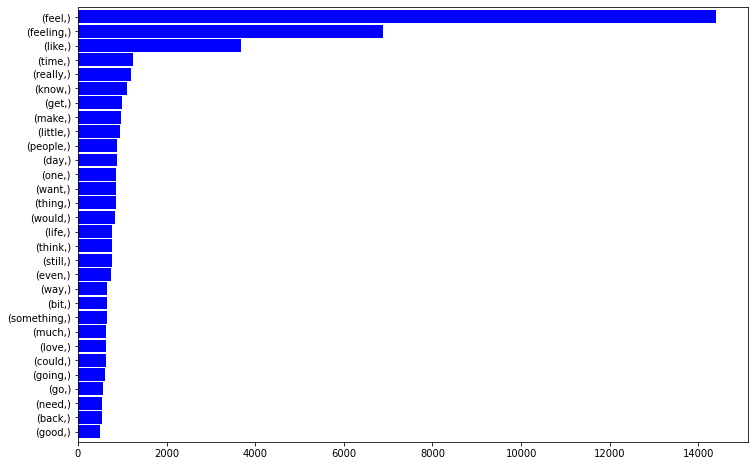

In [45]:
unigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

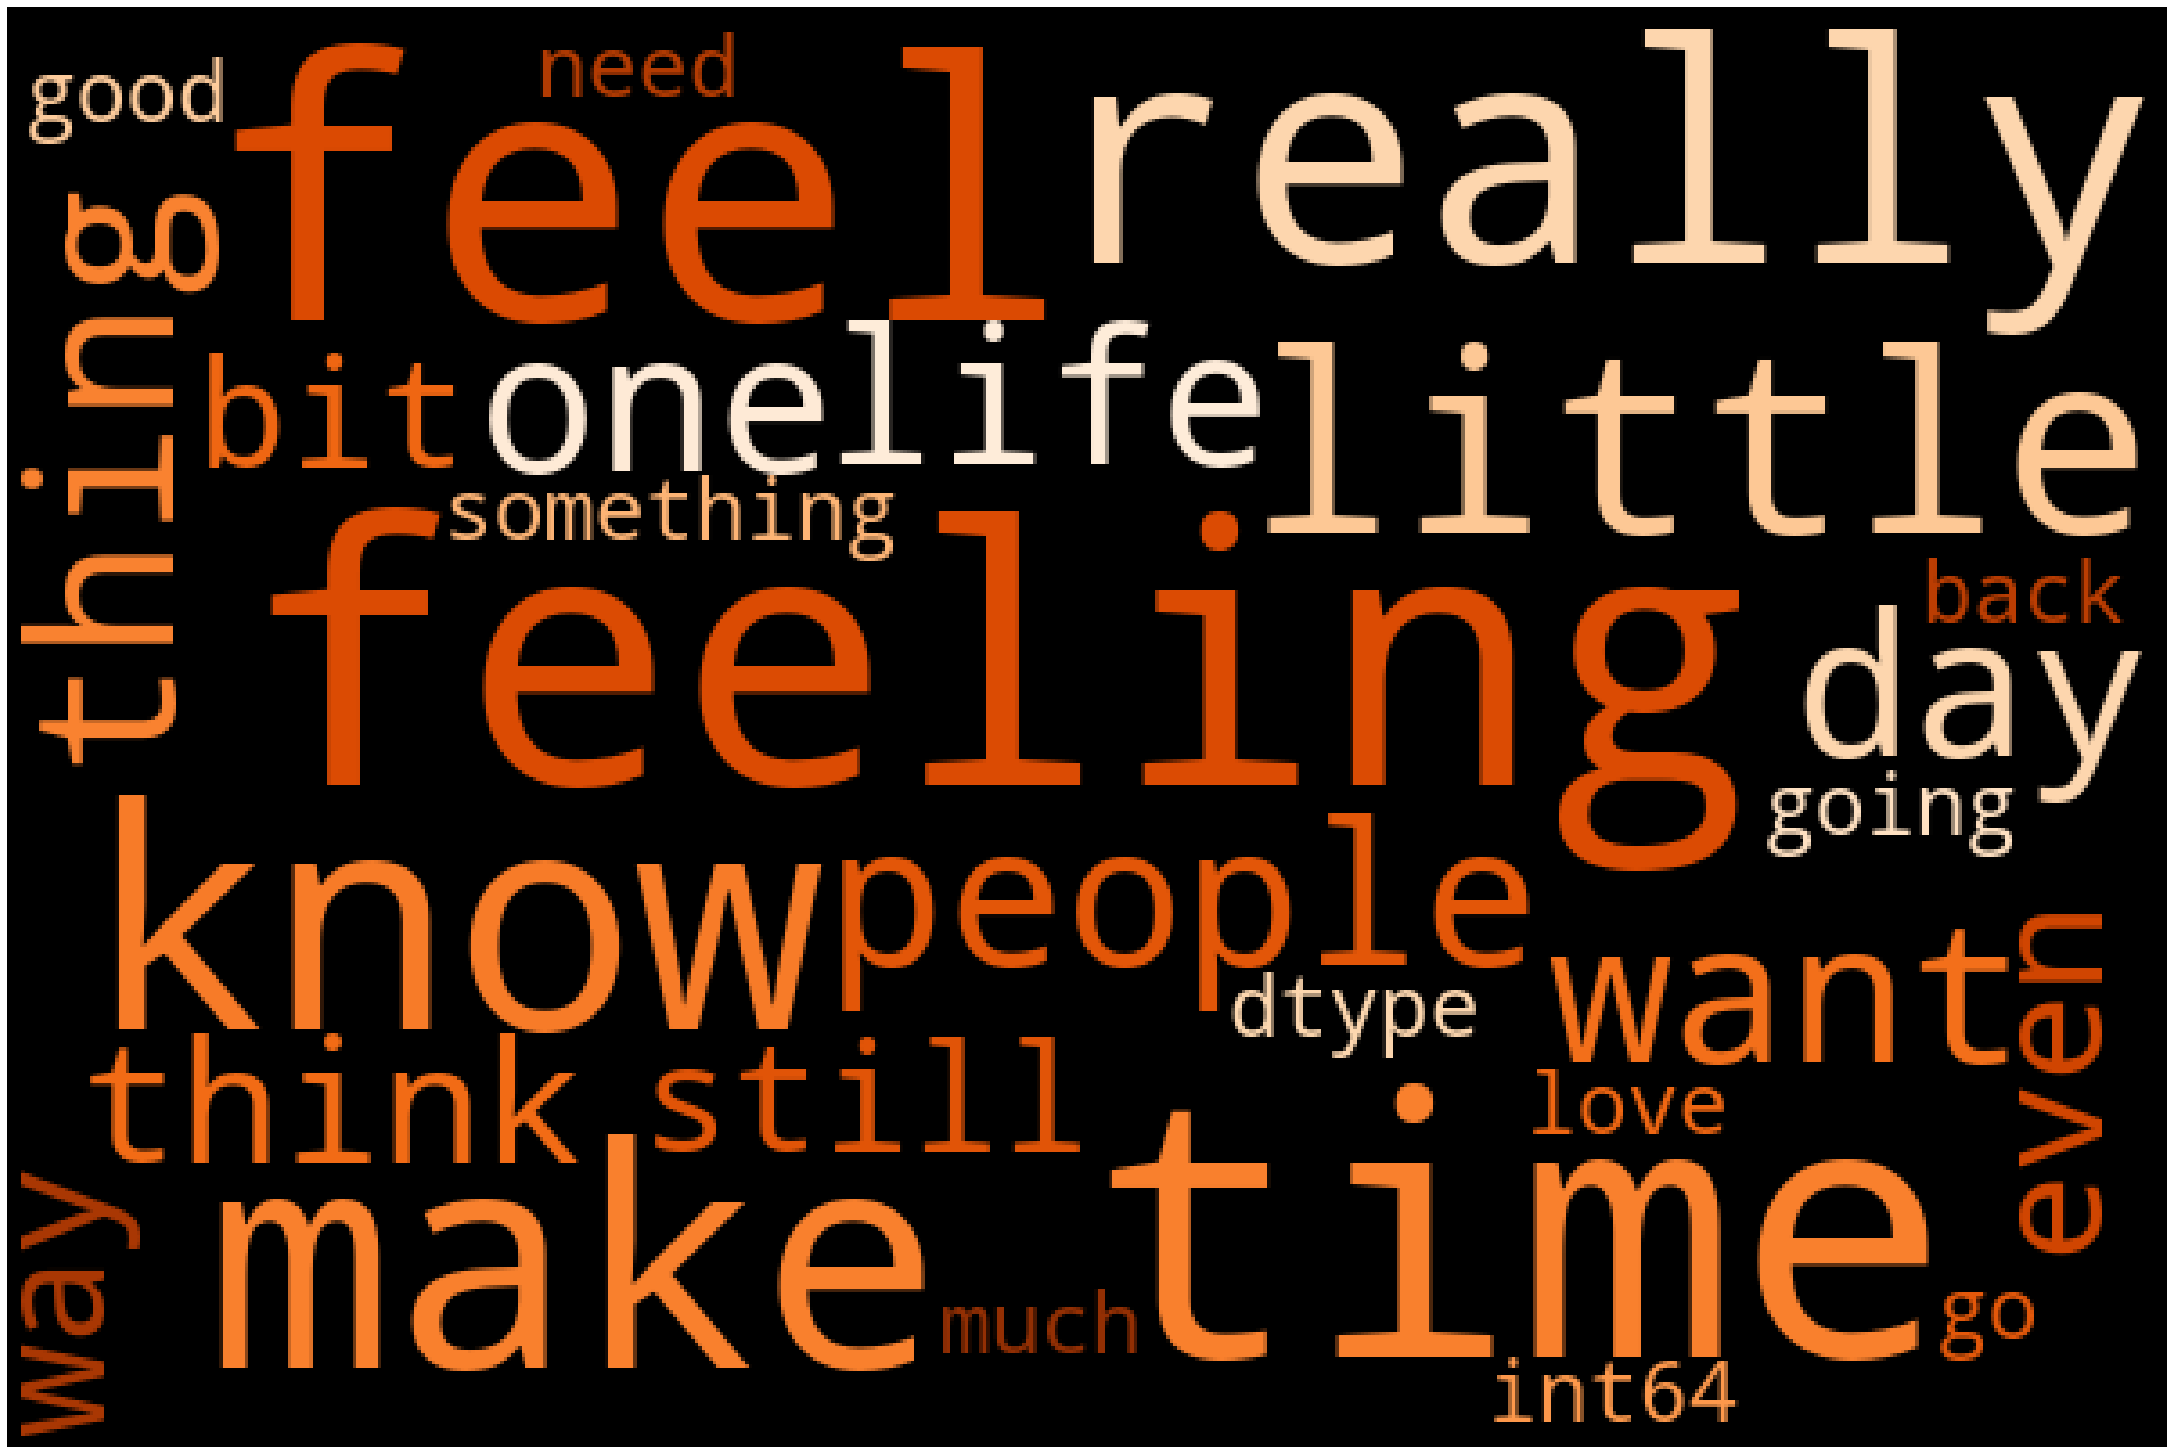

In [46]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(unigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()